In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Predict whether a male's semen is to be diagnosed as normal or altered(citing a possibiliy of asthenozoospermia or oligozoospermia)

In [4]:
df = pd.read_csv('fertility_Diagnosis.txt', error_bad_lines=False,header=None,sep=",")
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [5]:
df.head(8)

,0,1,2,3,4,5,6,7,8,9
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
5,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
6,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
7,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N


In [6]:
df=df.rename(columns={0: "Season", 1: "Age",2: "Childish diseases",3: "Accident or serious trauma",4: "Surgical intervention",5: "High fevers in the last year",6: "Frequency of alcohol consumption",7: "Smoking habit",8: "Number of hours spent sitting per day end",9: "Diagnosis"})

In [7]:
df.shape

(100, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Season                                     100 non-null    float64
 1   Age                                        100 non-null    float64
 2   Childish diseases                          100 non-null    int64  
 3   Accident or serious trauma                 100 non-null    int64  
 4   Surgical intervention                      100 non-null    int64  
 5   High fevers in the last year               100 non-null    int64  
 6   Frequency of alcohol consumption           100 non-null    float64
 7   Smoking habit                              100 non-null    int64  
 8   Number of hours spent sitting per day end  100 non-null    float64
 9   Diagnosis                                  100 non-null    object 
dtypes: float64(4), int64(5), ob

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Season,100.0,-0.0789,0.796725,-1.00,-1.00,-0.33,1.00,1.0
Age,100.0,0.6690,0.121319,0.50,0.56,0.67,0.75,1.0
Childish diseases,100.0,0.8700,0.337998,0.00,1.00,1.00,1.00,1.0
Accident or serious trauma,100.0,0.4400,0.498888,0.00,0.00,0.00,1.00,1.0
Surgical intervention,100.0,0.5100,0.502418,0.00,0.00,1.00,1.00,1.0
High fevers in the last year,100.0,0.1900,0.580752,-1.00,0.00,0.00,1.00,1.0
Frequency of alcohol consumption,100.0,0.8320,0.167501,0.20,0.80,0.80,1.00,1.0
Smoking habit,100.0,-0.3500,0.808728,-1.00,-1.00,-1.00,0.00,1.0
Number of hours spent sitting per day end,100.0,0.4068,0.186395,0.06,0.25,0.38,0.50,1.0


## Feature Engineering

### Checking for null values

In [10]:
df.isnull().sum()

Season                                       0
Age                                          0
Childish diseases                            0
Accident or serious trauma                   0
Surgical intervention                        0
High fevers in the last year                 0
Frequency of alcohol consumption             0
Smoking habit                                0
Number of hours spent sitting per day end    0
Diagnosis                                    0
dtype: int64

## Handling Categorical Data

One of the many ways to handle categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [13]:
# As output variable is ordinal we will do Label Encoding
df.replace({"N": 0, "O": 1}, inplace = True)

In [97]:
df.drop(['gender','ever_married','Residence_type','smoking_status'], axis = 1, inplace = True)

In [15]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day end,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


### Checking whether the target class is balanced or not

In [16]:
df["Diagnosis"].value_counts()

0    88
1    12
Name: Diagnosis, dtype: int64

[Text(0, 0, 'Normal'), Text(0, 0, 'Altered')]

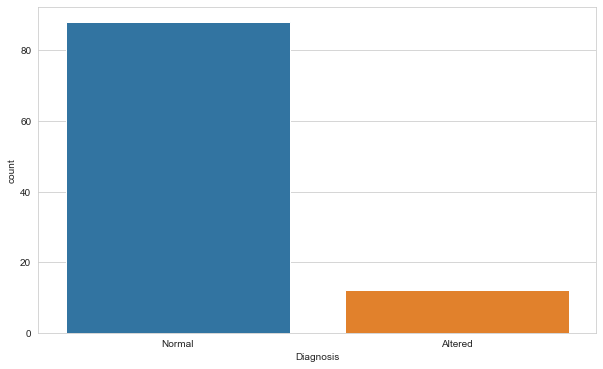

In [18]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Diagnosis",data=df)
plot.set_xticklabels(["Normal","Altered"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [19]:
columns = df.columns.tolist()
columns

['Season',
 'Age',
 'Childish diseases',
 'Accident or serious trauma',
 'Surgical intervention',
 'High fevers in the last year',
 'Frequency of alcohol consumption',
 'Smoking habit',
 'Number of hours spent sitting per day end',
 'Diagnosis']

In [20]:
X = df[['Season',
 'Age',
 'Childish diseases',
 'Accident or serious trauma',
 'Surgical intervention',
 'High fevers in the last year',
 'Frequency of alcohol consumption',
 'Smoking habit',
 'Number of hours spent sitting per day end',]]
Y = df['Diagnosis']

In [21]:
print(X.shape)
print(Y.shape)

(100, 9)
(100,)


In [22]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [23]:
os =RandomOverSampler(sampling_strategy=0.5)

In [24]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [25]:
X_train_res.shape,y_train_res.shape

((132, 9), (132,))

In [26]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 88, 1: 12})
Resampled dataset shape Counter({0: 88, 1: 44})


In [27]:
df=X_train_res
df['Diagnosis']=y_train_res

[Text(0, 0, 'Normal'), Text(0, 0, 'Altered')]

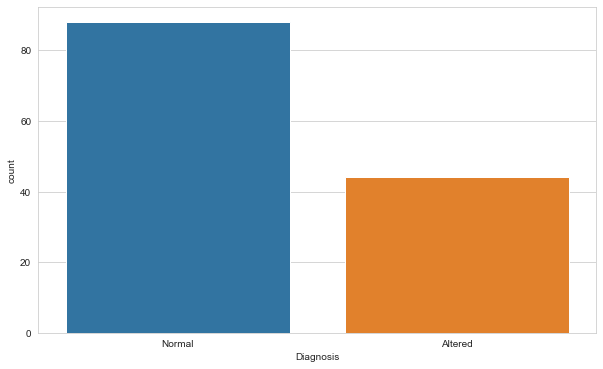

In [29]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Diagnosis",data=df)
plot.set_xticklabels(["Normal","Altered"])

In [30]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day end,Diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


## Performing EDA using Panda Profiling

In [31]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Semen Diagnosis')
prof_report.to_widgets()

## Feature Selection

#### Using Feature importance

In [36]:
df.columns

Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day end', 'Diagnosis'],
      dtype='object')

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['Season', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit']]  #independent columns
y = df['Diagnosis']    #target column

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [40]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.18768933 0.0801244  0.12395038 0.13271985 0.12943766 0.20106239
 0.14501598]


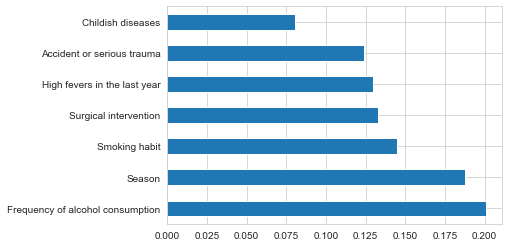

In [41]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

In [60]:
x=df[['Season', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit']]

In [61]:
y = df['Diagnosis']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

### K Neighbors Classifier

In [63]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [64]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

In [65]:
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [67]:
knn_scores

[0.888888888888889,
 0.8166666666666667,
 0.7666666666666667,
 0.7766666666666667,
 0.7777777777777778,
 0.7988888888888889,
 0.78,
 0.77,
 0.72,
 0.7588888888888888,
 0.76,
 0.7588888888888888,
 0.7077777777777777,
 0.788888888888889,
 0.7488888888888889,
 0.7288888888888888,
 0.7188888888888888,
 0.7177777777777777,
 0.6677777777777777,
 0.6877777777777778,
 0.6877777777777778,
 0.6777777777777778,
 0.6988888888888889,
 0.6488888888888888,
 0.638888888888889,
 0.6377777777777778,
 0.6277777777777778,
 0.6477777777777777,
 0.6377777777777778]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

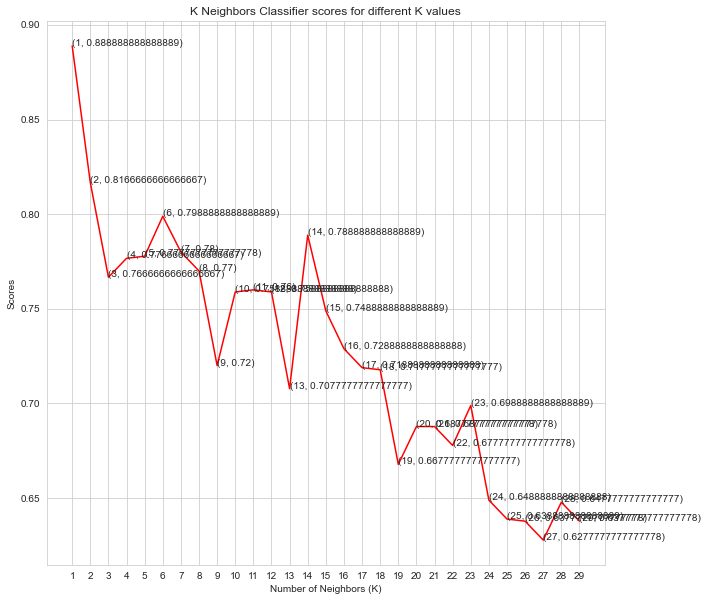

In [68]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [69]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [70]:
error_rate

[0.15151515151515152,
 0.15151515151515152,
 0.18181818181818182,
 0.12121212121212122,
 0.15151515151515152,
 0.15151515151515152,
 0.12121212121212122,
 0.12121212121212122,
 0.15151515151515152,
 0.15151515151515152,
 0.15151515151515152,
 0.24242424242424243,
 0.24242424242424243,
 0.2727272727272727,
 0.2727272727272727,
 0.2727272727272727,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.30303030303030304,
 0.30303030303030304,
 0.24242424242424243,
 0.2727272727272727,
 0.36363636363636365,
 0.36363636363636365,
 0.36363636363636365]

Text(0.5, 1.0, 'Error rate for different K values')

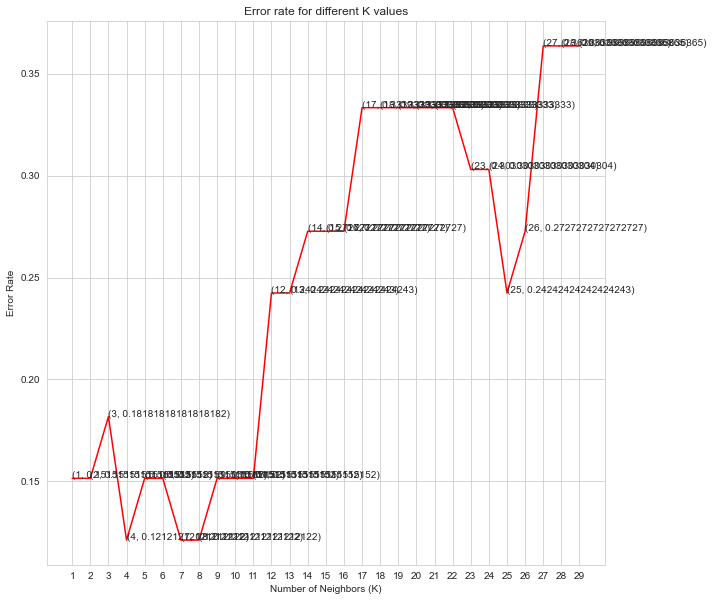

In [71]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 30)],error_rate, color = 'red')
for i in range(1,30):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=4 could be an ideal choice as it gives less error rate and more accuracy

In [72]:
knnclassifier = KNeighborsClassifier(n_neighbors=4)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8787878787878788

In [73]:
print(confusion_matrix(y_test,y_pred))

[[21  0]
 [ 4  8]]


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.67      0.80        12

    accuracy                           0.88        33
   macro avg       0.92      0.83      0.86        33
weighted avg       0.90      0.88      0.87        33



### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [77]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [78]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9090909090909091

In [79]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04101923142327181


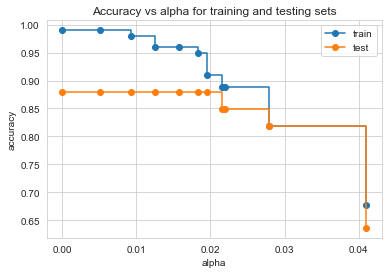

In [81]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [82]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [83]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8787878787878788

In [84]:
print(confusion_matrix(y_test,pred))

[[18  3]
 [ 1 11]]


In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.79      0.92      0.85        12

    accuracy                           0.88        33
   macro avg       0.87      0.89      0.87        33
weighted avg       0.89      0.88      0.88        33



### RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,None],    #None means till full depth
              'n_estimators':[10,100,200,300,400,500],   # Number of Decision Trees
              'max_features':randint(1,8),   # AS I have 7 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [94]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [95]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, x, y)

In [96]:
rf_parameters

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [97]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=200,bootstrap= False,criterion='gini',max_depth=5,max_features=1,min_samples_leaf= 3)

In [98]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=5, max_features=1,
                       min_samples_leaf=3, n_estimators=200, n_jobs=-1)

In [99]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[21  0]
 [ 3  9]]
0.9090909090909091


In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.75      0.86        12

    accuracy                           0.91        33
   macro avg       0.94      0.88      0.90        33
weighted avg       0.92      0.91      0.91        33



### Logisitic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.776557 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773993 (0.102024) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773993 (0.102024) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.773993 (0.102024) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.776557 (0.104736) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.776557 (0.104736) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.771429 (0.110462) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.731319 (0.110823) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.731319 (0.110823) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.720879 (0.117702) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.669414 (0.058271) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.669414 (0.058271) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.679853 (0.078937) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.667033 (0.032151) with

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [109]:
logisticRegr = LogisticRegression(C=1.0,penalty="l2",solver='newton-cg')

In [110]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [111]:
predictions = logisticRegr.predict(x_test)

In [112]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[19  2]
 [ 8  4]]


In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        21
           1       0.67      0.33      0.44        12

    accuracy                           0.70        33
   macro avg       0.69      0.62      0.62        33
weighted avg       0.69      0.70      0.67        33



### SVM

In [114]:
from sklearn.svm import SVC
model = SVC()

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [116]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [119]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.895 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.550 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.850 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.600 total time=   0.0s
[CV 2/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [130]:
model=SVC(C=100,gamma=1,kernel="rbf")

In [131]:
model.fit(x_train,y_train)

SVC(C=100, gamma=1)

In [132]:
predictions = model.predict(x_test)

In [133]:
print(confusion_matrix(y_test,predictions))

[[19  2]
 [ 1 11]]


In [134]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.85      0.92      0.88        12

    accuracy                           0.91        33
   macro avg       0.90      0.91      0.90        33
weighted avg       0.91      0.91      0.91        33



## FINAL MODEL SELECTED- SVM Model (rbf kernel)

In [135]:
from sklearn.svm import SVC
model = SVC()

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [137]:
model=SVC(C=100,gamma=1,kernel="rbf")
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  2]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.85      0.92      0.88        12

    accuracy                           0.91        33
   macro avg       0.90      0.91      0.90        33
weighted avg       0.91      0.91      0.91        33

